In [1]:
import numpy as np
import pylab as plt
from astropy import units as u

#import the snewpy modules
from snewpy.models import presn
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, MassHierarchy

from snewpy.neutrino import Flavor

In [2]:
#set the plot parameters
plt.rc('grid',ls=':')
plt.rc('axes',grid=True)
plt.rc('legend',fontsize=12,loc='upper right')

In [3]:
#define drawing styles for each flavor
styles = {f: dict(color='C0' if f.is_electron else 'C1',
                    ls='-' if f.is_neutrino else ':',
                    label=f.to_tex()) for f in Flavor}

## Initialize the model and calculate the flux

In [4]:
#define the model
model = presn.Kato_2017(progenitor_mass=15*u.Msun)
model

**Kato_2017 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $15$ $\mathrm{M_{\odot}}$|

In [5]:
# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,25,201) * u.MeV 
t = np.geomspace(-2*u.day,-1*u.s,101)
distance = 1*u.kpc

In [6]:
flux = model.get_flux(t,E,
               distance=distance, 
               flavor_xform=NoTransformation())
flux

d2FdEdT (4, 101, 201) [1 / (MeV s m2)]: <4 flavor(0;3) x 101 time(-172800.0 s;-1.0 s) x 201 energy(0.0 MeV;25.0 MeV)>

## Plotting the integral neutrino fluence and rates

### Integral neutrino rate vs. time

### Intergral neutrino fluence vs. Energy for the last hour before collapse

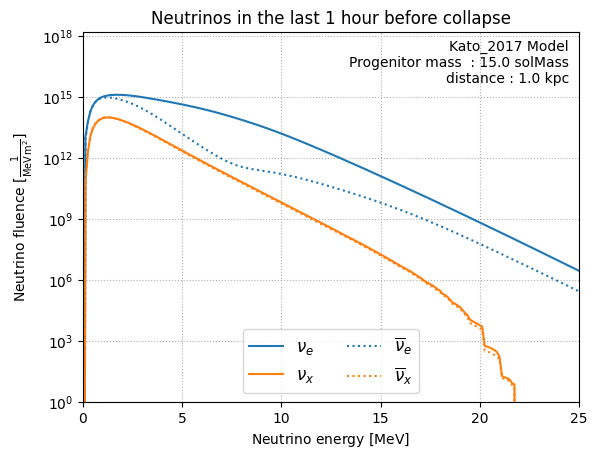

In [7]:
#integrate the flux over the last hour before the collapse
fluence = flux.integrate('time', limits=[-1, 0]<<u.hour)
#get the relevant arrays for plotting
x = fluence.energy
y = fluence.array.squeeze()
#plot each flavor
for flv in fluence.flavor:
    plt.plot(x,y[flv], **styles[flv])
#add the legend
plt.legend(ncol=2, loc='lower center')
#adjust the scales
plt.autoscale(tight=True,axis='x')
plt.yscale('log')
plt.ylim(1)
#define the labels
xlabel = 'Neutrino energy'
ylabel = 'Neutrino fluence'
plt.xlabel(f'{xlabel} [{x.unit._repr_latex_()}]')
plt.ylabel(f'{ylabel} [{y.unit._repr_latex_()}]')
#add the plot title
plt.title('Neutrinos in the last 1 hour before collapse')
#add the model parameters
plt.annotate(str(model) + f'\ndistance : {distance}',
             xy=(0.98,0.98),
             xycoords='axes fraction',
             va='top', ha='right'
            )
plt.show()

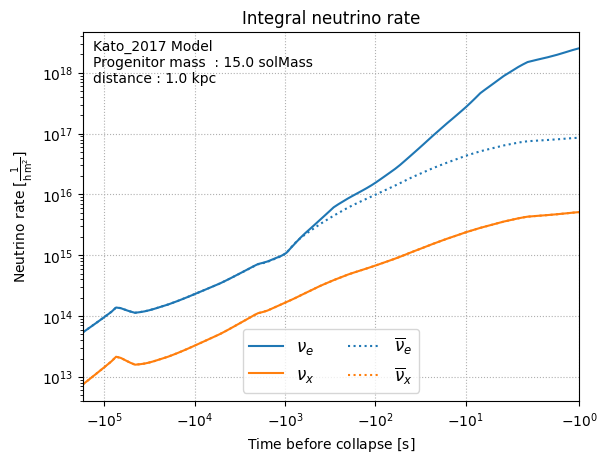

In [8]:
#integrate the flux over all energy bins
rate = flux.integrate('energy')
#get the relevant arrays for plotting
x = rate.time
y = rate.array.squeeze()
#we can also convert to a more convenient unit
y = y.to('1/(hour*m**2)')
#plot each flavor
for flv in rate.flavor:
    plt.plot(x,y[flv], **styles[flv])
#add the legend
plt.legend(ncol=2, loc='lower center')
#adjust the scales
plt.autoscale(tight=True,axis='x')
plt.yscale('log')
#plt.ylim(1)
#define the labels
xlabel = 'Time before collapse'
ylabel = 'Neutrino rate'
plt.xlabel(f'{xlabel} [{x.unit._repr_latex_()}]')
plt.ylabel(f'{ylabel} [{y.unit._repr_latex_()}]')
#add the plot title
plt.title('Integral neutrino rate')
#add the model parameters
plt.annotate(str(model) + f'\ndistance : {distance}',
             xy=(0.02,0.98),
             xycoords='axes fraction',
             va='top', ha='left'
            )
plt.xscale('symlog')
plt.show()

## Plot energy spectrum with neutrino oscillations

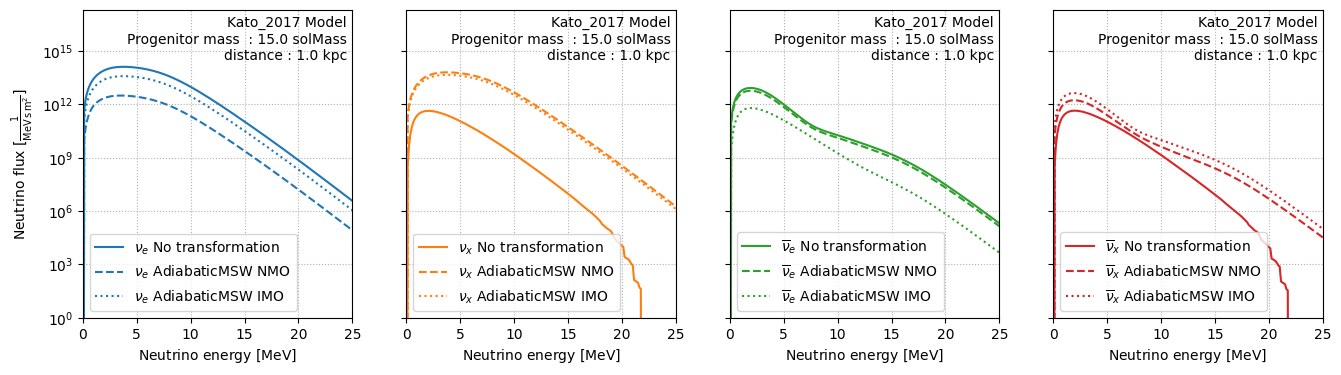

In [9]:
# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,25,201) * u.MeV
t = -1*u.s

xforms = [NoTransformation(), AdiabaticMSW(mh=MassHierarchy.NORMAL), AdiabaticMSW(mh=MassHierarchy.INVERTED)]
labels = ['No transformation', 'AdiabaticMSW NMO', 'AdiabaticMSW IMO']
xform_styles = ['-','--',':']
flavor_colors = ['C0','C1','C2','C3']

#calculate the flux for different transformations
fluxes  = {xform: model.get_flux(t, E, distance, flavor_xform=xform) for xform in xforms}
#make a big figure
fig, axes = plt.subplots(1,4,figsize=(16,4), sharex=True, sharey=True)

for flv, ax in zip(Flavor,axes):
    plt.sca(ax)
    for xform, line_style, label in zip(xforms,xform_styles, labels):
        flux = fluxes[xform]
        #get the relevant arrays for plotting
        x = flux.energy
        y = flux.array[flv].squeeze()
        #plot each flavor
        plt.plot(x,y, 
                 ls=line_style, 
                 color=flavor_colors[flv], 
                 label=f'{Flavor(flv).to_tex()} {label}'
                )
        
    #add the legend
    plt.legend(ncol=1, loc='lower left', fontsize=10)
    
    #define the labels
    xlabel = 'Neutrino energy'
    ylabel = 'Neutrino flux'
    plt.xlabel(f'{xlabel} [{x.unit._repr_latex_()}]')
    #add the plot title

    #add the model parameters
    plt.annotate(str(model) + f'\ndistance : {distance}',
                 xy=(0.98,0.98),
                 xycoords='axes fraction',
                 va='top', ha='right'
                )
    axes[0].set_ylabel(f'{ylabel} [{y.unit._repr_latex_()}]')
    #adjust the scales
    plt.autoscale(tight=True,axis='x')
    plt.autoscale(tight=False,axis='y')
    plt.yscale('log')
    plt.ylim(1)
plt.show()